# (Core) Preparing Time Series from Wide-Form Data

## Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import numpy as np

## Load data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


## Filter the 4 largest cities into a new dataframe.

Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]

In [4]:
top_4_largest_cities = df[df['SizeRank'] <= 3]
top_4_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis.

We need to use pd.melt to turn wide-form data into long-form and use id_vars to keep some columns. 

In [5]:
# check columns
top_4_largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted_df = pd.melt(top_4_largest_cities,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name='Date', value_name='Price')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   Price       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


### Convert months into the datetime index.

In [8]:
# create a datetime column
fmt = "%Y-%m-%d"
melted_df['Months'] = pd.to_datetime(melted_df['Date'], format=fmt,
                                         infer_datetime_format=False, errors='coerce')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,Months
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0,2000-01-31
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0,2000-01-31
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0,2000-01-31
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0,2000-01-31
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0,2022-08-31
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0,2022-09-30
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0,2022-09-30
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0,2022-09-30


In [9]:
melted_df['Months'].isna().sum()

0

In [10]:
# check
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   object        
 9   Price       1087 non-null   float64       
 10  Months      1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 94.0+ KB


In [11]:
# drop column Date
melted_df = melted_df.drop(columns='Date')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price,Months
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,2000-01-31
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,2000-01-31
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,2000-01-31
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,2000-01-31
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0,2022-08-31
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0,2022-09-30
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0,2022-09-30
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,272639.0,2022-09-30


### Make month the index.

In [12]:
## Setting the datetime index
df_ts = melted_df.set_index('Months')
df_ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Months,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [13]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Months', length=1092, freq=None)

## Resample the dataframe in Months, grouped by City

In [14]:
df_groupby = df_ts.groupby('RegionName').resample("M").sum()
df_groupby

C:\Users\esnak\AppData\Local\Temp\ipykernel_15272\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby = df_ts.groupby('RegionName').resample("M").sum()
C:\Users\esnak\AppData\Local\Temp\ipykernel_15272\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby = df_ts.groupby('RegionName').resample("M").sum()
C:\Users\esnak\AppData\Local\Temp\ipykernel_15272\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which

RegionID  SizeRank     Price
RegionName Months                                  
Chicago    2000-01-31     17426         3  166139.0
           2000-02-29     17426         3  166536.0
           2000-03-31     17426         3  167368.0
           2000-04-30     17426         3  168826.0
           2000-05-31     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-31      6181         0  768797.0
           2022-06-30      6181         0  773944.0
           2022-07-31      6181         0  777692.0
           2022-08-31      6181         0  779960.0
           2022-09-30      6181         0  781622.0

[1092 rows x 3 columns]

# Part 2

In [15]:
# Now we have we have a multi-index with 2 levels.
# Level 0 (the outer-most index on the left) and level 1 (the next/inner index)

# level 0 is City
df_groupby.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [16]:
# Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
# We want the (level 0) so we will need to specify level=0.

unstacked = df_groupby.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Months                                                                          
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                        Price                                  
RegionName New York   Chicago   Houston Los Angeles  New York  
Months                                                         
2000-01-31        0  166139.0  109068.0    234181.0  253690.0  
2000-02-29        0  166536.0  109079.0    234401.0  255517.0  
2000-03-31        0  167368.0  108878.0    235513.0  257207.0  
2000-04-30        0  168826.0  108881.0    237589.0  260310.0  
2000-05-31        0  170499.0  108834.0    240113.0  263204.0  
...             ...       ...       ...         ...       ...  
2022-05-31        0  312487.0  265558.0    990391.0  768797.0  
2022-06-30        0  314663.0  268901.0    992337.0  773944.0  
2022-07-31        0  315910.0  271059.0    992630.0  777692.0  
2022-08-31        0  315587.0  272400.0    978196.0  779960.0  
2022-09-30        0  315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [17]:
unstacked.columns

MultiIndex([('RegionID',     'Chicago'),
            ('RegionID',     'Houston'),
            ('RegionID', 'Los Angeles'),
            ('RegionID',    'New York'),
            ('SizeRank',     'Chicago'),
            ('SizeRank',     'Houston'),
            ('SizeRank', 'Los Angeles'),
            ('SizeRank',    'New York'),
            (   'Price',     'Chicago'),
            (   'Price',     'Houston'),
            (   'Price', 'Los Angeles'),
            (   'Price',    'New York')],
           names=[None, 'RegionName'])

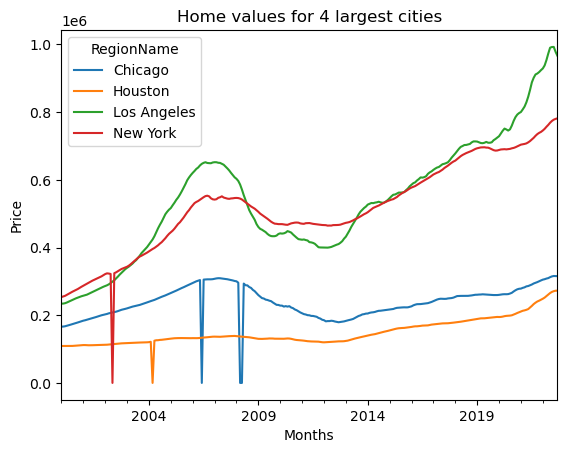

In [18]:
ax = unstacked['Price'].plot()
ax.set(title='Home values for 4 largest cities', ylabel="Price")
plt.show()

In [19]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)
